<a href="https://colab.research.google.com/github/Mumenunnessa/NLP/blob/master/Covid_updated_confirm_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
!pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.7/dist-packages (2.4.1)


In [41]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [42]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [43]:
RANDOM_SEED = 42
TEST_SIZE = 0.3
LOOK_BACK = 1
BATCH_SIZE = 1
EPOCHS = 100
DAYS_TO_PREDICT = 30
Location="Bangladesh"
Train_case = 'Confirmed'

In [44]:
np.random.seed(RANDOM_SEED)

In [45]:
df=pd.read_csv("/content/gdrive/MyDrive/Personal things (important)/covid-update.csv")

In [46]:
df

,Date,Confirmed,Deaths,Recovery
0,2/1/2021,443,10,472
1,2/2/2021,525,12,512
2,2/3/2021,438,13,578
3,2/4/2021,485,13,611
4,2/5/2021,435,7,507
5,2/6/2021,305,8,417
6,2/7/2021,292,15,417
7,2/8/2021,316,16,559
8,2/9/2021,387,8,642
9,2/10/2021,388,10,717


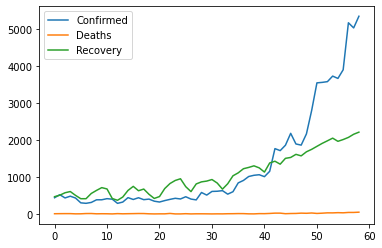

<Figure size 516x344 with 0 Axes>

In [47]:
df.plot()
plt.figure(dpi=86)
plt.show()  

In [48]:
df.head()

,Date,Confirmed,Deaths,Recovery
0,2/1/2021,443,10,472
1,2/2/2021,525,12,512
2,2/3/2021,438,13,578
3,2/4/2021,485,13,611
4,2/5/2021,435,7,507


In [49]:
df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)

In [50]:
df.head()

,Confirmed,Deaths,Recovery
Date,,,
2021-02-01,443,10,472
2021-02-02,525,12,512
2021-02-03,438,13,578
2021-02-04,485,13,611
2021-02-05,435,7,507


In [51]:
df.shape

(59, 3)

In [52]:
cases = df.filter([Train_case])
cases = cases[(cases.T != 0).any()]

In [53]:
cases.head()

,Confirmed
Date,
2021-02-01,443
2021-02-02,525
2021-02-03,438
2021-02-04,485
2021-02-05,435


<Figure size 432x288 with 0 Axes>

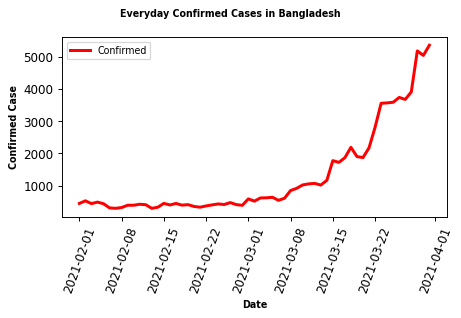

In [54]:
plt.figure(figsize=(6,4))
plt.figure(dpi=86)
plt.suptitle('Everyday Confirmed Cases in Bangladesh',fontsize=8,fontweight='bold')
plt.plot(cases, label=Train_case,color='red', linewidth=2.5)
plt.xlabel('Date',fontsize=8,fontweight='bold')
plt.ylabel('Confirmed Case',fontsize=8,fontweight='bold')
plt.xticks(rotation=70)
plt.legend(prop={"size":8})
plt.tight_layout(3)
plt.show()
plt.show()

<Figure size 432x288 with 0 Axes>

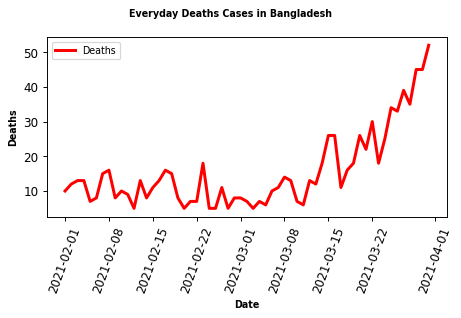

In [55]:
plt.figure(figsize=(6,4))
plt.figure(dpi=86)
plt.suptitle('Everyday Deaths Cases in Bangladesh',fontsize=8,fontweight='bold')
plt.plot(df.Deaths, label='Deaths',color='red',linewidth=2.5)
plt.xlabel('Date',fontsize=8,fontweight='bold')
plt.ylabel('Deaths',fontsize=8,fontweight='bold')
plt.xticks(rotation=70)
plt.legend(prop={"size":8})
plt.tight_layout(3)
plt.show()
plt.show()

<Figure size 432x288 with 0 Axes>

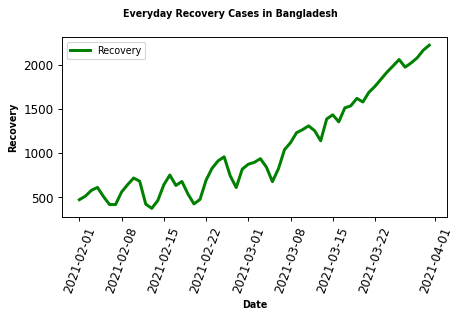

In [56]:
plt.figure(figsize=(6,4))
plt.figure(dpi=86)
plt.suptitle('Everyday Recovery Cases in Bangladesh',fontsize=8,fontweight='bold')
plt.plot(df.Recovery, label='Recovery',color='green',linewidth=2.5)
plt.xlabel('Date',fontsize=8,fontweight='bold')
plt.ylabel('Recovery',fontsize=8,fontweight='bold')
plt.xticks(rotation=70)
plt.legend(prop={"size":8})
plt.tight_layout(3)
plt.show()
#plt.show()

In [57]:
cases.shape

(59, 1)

In [58]:
def data_split(data, look_back=1):
    x, y = [], []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back), 0]
        x.append(a)
        y.append(data[i + look_back, 0])
    return np.array(x), np.array(y)

In [59]:
test_size = TEST_SIZE
test_size = int(cases.shape[0] * test_size)
train_cases = cases[:-test_size]
test_cases = cases[-test_size:]


In [60]:
train_cases.shape

(42, 1)

In [61]:
test_cases.shape

(17, 1)

In [62]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(cases)
all_cases = scaler.transform(cases)
train_cases = scaler.transform(train_cases)
test_cases = scaler.transform(test_cases)

In [63]:
all_cases.shape,train_cases.shape,test_cases.shape

((59, 1), (42, 1), (17, 1))

In [64]:
look_back = LOOK_BACK
X_all, Y_all = data_split(all_cases, look_back=look_back)
X_train, Y_train = data_split(train_cases, look_back=look_back)
X_test, Y_test = data_split(test_cases, look_back=look_back)

In [65]:
X_all.shape,X_train.shape,X_test.shape

((57, 1), (40, 1), (15, 1))

In [66]:
X_all = np.array(X_all).reshape(X_all.shape[0], 1, 1)
Y_all = np.array(Y_all).reshape(Y_all.shape[0], 1)
X_train = np.array(X_train).reshape(X_train.shape[0], 1, 1)
Y_train = np.array(Y_train).reshape(Y_train.shape[0], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], 1, 1)
Y_test = np.array(Y_test).reshape(Y_test.shape[0], 1)

In [67]:
X_all.shape,Y_all.shape,X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((57, 1, 1), (57, 1), (40, 1, 1), (40, 1), (15, 1, 1), (15, 1))

LSTM

In [68]:
batch_size = BATCH_SIZE
model = Sequential()
model.add(LSTM(4, return_sequences=True, 
               batch_input_shape=(batch_size, X_train.shape[1], X_train.shape[2]), 
               stateful=True))
model.add(LSTM(1, stateful=True))
model.add(Dense(Y_train.shape[1]))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (1, 1, 4)                 96        
_________________________________________________________________
lstm_1 (LSTM)                (1, 1)                    24        
_________________________________________________________________
dense (Dense)                (1, 1)                    2         
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________
None


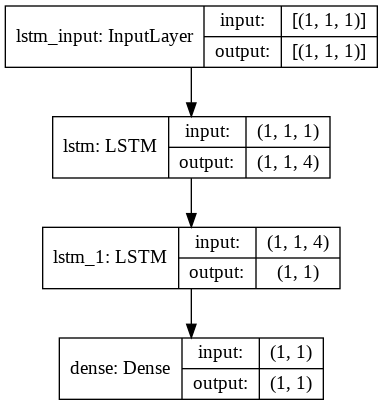

In [69]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

In [70]:
epoch = EPOCHS
loss = []
for i in range(epoch):
    print('Iteration ' + str(i + 1) + '/' + str(epoch))
    model.fit(X_train, Y_train, batch_size=batch_size, 
              epochs=1, verbose=1, shuffle=False)
    h = model.history
    loss.append(h.history['loss'][0])
    model.reset_states()

Iteration 1/100
40/40 [==============================] - 5s 4ms/step - loss: 1.0391
Iteration 2/100
40/40 [==============================] - 0s 4ms/step - loss: 0.5590
Iteration 3/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2579
Iteration 4/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1012
Iteration 5/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0642
Iteration 6/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0553
Iteration 7/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0504
Iteration 8/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0465
Iteration 9/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0432
Iteration 10/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0403
Iteration 11/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0377
Iteration 12/100
40/40 [==============================] - 0s 4ms/step - lo

<Figure size 432x288 with 0 Axes>

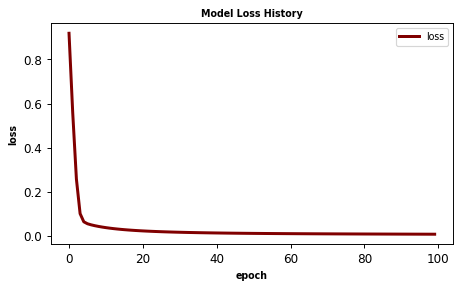

In [71]:
plt.figure(figsize=(6,4))
plt.figure(dpi=86)
plt.plot(loss, label='loss',color='Maroon',linewidth=2.5)
plt.title('Model Loss History',fontsize=8,fontweight='bold')
plt.xlabel('epoch',fontsize=8,fontweight='bold')
plt.ylabel('loss',fontsize=8,fontweight='bold')
plt.legend(prop={"size":8})
plt.tight_layout(3)
plt.show()

In [72]:
train_predict = model.predict(X_train, batch_size=batch_size)

In [73]:
days_to_predict = X_test.shape[0]
test_predict = []
pred_samples = train_predict[-1:]
pred_samples = np.array([pred_samples])
for i in range(days_to_predict):
    pred = model.predict(X_test[i:(i+1)], batch_size=batch_size)
    pred = np.array(pred).flatten()
    test_predict.append(pred)
test_predict = np.array(test_predict).reshape(1, len(test_predict), 1)

In [74]:
model.reset_states()

In [75]:
X_train_flatten = np.array(scaler.inverse_transform(
    np.array(X_train).reshape(X_train.shape[0], 1)
)).flatten().astype('int')
Y_train_flatten = np.array(scaler.inverse_transform(
    np.array(Y_train).reshape(Y_train.shape[0], 1)
)).flatten().astype('int')
train_predict_flatten = np.array(scaler.inverse_transform(
    np.array(train_predict).reshape(train_predict.shape[0], 1)
)).flatten().astype('int')
X_test_flatten = np.array(scaler.inverse_transform(
    np.array(X_test).reshape(X_test.shape[0], 1)
)).flatten().astype('int')
Y_test_flatten = np.array(scaler.inverse_transform(
    np.array(Y_test).reshape(Y_test.shape[0], 1)
)).flatten().astype('int')
test_predict_flatten = np.array(scaler.inverse_transform(
    np.array(test_predict).reshape(test_predict.shape[1], 1)
)).flatten().astype('int')

In [76]:
train_predict_score = math.sqrt(
    mean_squared_error(
        Y_train_flatten, 
        train_predict_flatten
    )
)
test_predict_score = math.sqrt(
    mean_squared_error(
        Y_test_flatten, 
        test_predict_flatten
    )
)

In [77]:
'Train Score: %.2f RMSE' % (train_predict_score)

'Train Score: 197.27 RMSE'

In [78]:
'Test Score: %.2f RMSE' % (test_predict_score)

'Test Score: 2611.56 RMSE'

<Figure size 576x360 with 0 Axes>

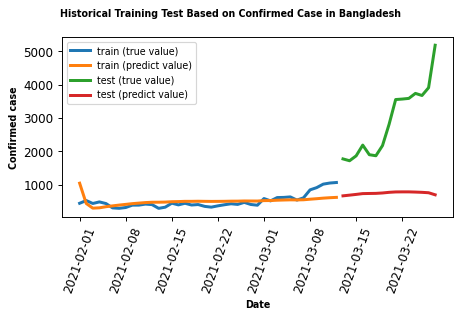

In [79]:
plt.figure(figsize=(8, 5))
plt.figure(dpi=86)
plt.plot(
    cases.index[:len(X_train_flatten)],
    X_train_flatten,
    label='train (true value)',linewidth=2.5
)
plt.plot(
    cases.index[:len(train_predict_flatten)],
    train_predict_flatten,
    label='train (predict value)',linewidth=2.5
)
plt.plot(
    cases.index[len(X_train_flatten):len(X_train_flatten) + len(X_test_flatten)],
    X_test_flatten,
    label='test (true value)',linewidth=2.5
)
plt.plot(
    cases.index[len(X_train_flatten):len(X_train_flatten) + len(test_predict_flatten)],
    test_predict_flatten,
    label='test (predict value)',linewidth=2.5
)
plt.suptitle('Historical Training Test Based on Confirmed Case in Bangladesh',fontsize=8,fontweight='bold')
plt.xlabel('Date',fontsize=8,fontweight='bold')
plt.ylabel('Confirmed case',fontsize=8,fontweight='bold')
plt.xticks(rotation=70)
plt.legend(prop={"size":8})
plt.tight_layout(3)
plt.show()

In [80]:
model.reset_states()

In [81]:
epoch = EPOCHS
loss = []
for i in range(epoch):
    print('Iteration ' + str(i + 1) + '/' + str(epoch))
    model.fit(X_all, Y_all, batch_size=batch_size, 
              epochs=1, verbose=1, shuffle=False)
    h = model.history
    loss.append(h.history['loss'][0])
    model.reset_states()

Iteration 1/100
57/57 [==============================] - 0s 3ms/step - loss: 0.2466
Iteration 2/100
57/57 [==============================] - 0s 4ms/step - loss: 0.2480
Iteration 3/100
57/57 [==============================] - 0s 5ms/step - loss: 0.2028
Iteration 4/100
57/57 [==============================] - 0s 4ms/step - loss: 0.1779
Iteration 5/100
57/57 [==============================] - 0s 3ms/step - loss: 0.1583
Iteration 6/100
57/57 [==============================] - 0s 3ms/step - loss: 0.1433
Iteration 7/100
57/57 [==============================] - 0s 4ms/step - loss: 0.1320
Iteration 8/100
57/57 [==============================] - 0s 4ms/step - loss: 0.1229
Iteration 9/100
57/57 [==============================] - 0s 3ms/step - loss: 0.1147
Iteration 10/100
57/57 [==============================] - 0s 5ms/step - loss: 0.1071
Iteration 11/100
57/57 [==============================] - 0s 5ms/step - loss: 0.1004
Iteration 12/100
57/57 [==============================] - 0s 4ms/step - lo

<Figure size 432x288 with 0 Axes>

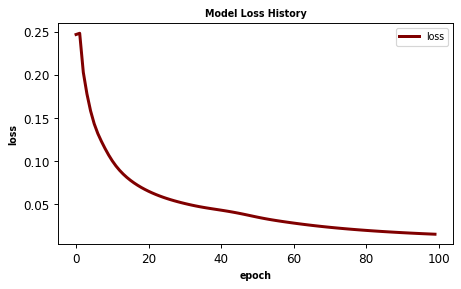

In [82]:
plt.figure(figsize=(6,4))
plt.figure(dpi=86)
plt.plot(loss, label='loss',color='Maroon',linewidth=2.5)
plt.title('Model Loss History',fontsize=8,fontweight='bold')
plt.xlabel('epoch',fontsize=8,fontweight='bold')
plt.ylabel('loss',fontsize=8,fontweight='bold')
plt.legend(prop={"size":8})
plt.tight_layout(3)
plt.show()

In [83]:
all_predict = model.predict(X_all, batch_size=batch_size)

In [84]:
days_to_predict = DAYS_TO_PREDICT
future_predict = []
pred_samples = all_predict[-1:]
pred_samples = np.array([pred_samples])
for i in range(days_to_predict):
    pred = model.predict(pred_samples, batch_size=batch_size)
    pred = np.array(pred).flatten()
    future_predict.append(pred)
    new_samples = np.array(pred_samples).flatten()
    new_samples = np.append(new_samples, [pred])
    new_samples = new_samples[1:]
    pred_samples = np.array(new_samples).reshape(1, 1, 1)
future_predict = np.array(future_predict).reshape(len(future_predict), 1, 1)

In [85]:
model.reset_states()

In [86]:
f_future_predict = model.predict(future_predict, batch_size=batch_size)

In [87]:
model.reset_states()

In [88]:
X_all_flatten = np.array(scaler.inverse_transform(
    np.array(X_all).reshape(X_all.shape[0], 1)
)).flatten().astype('int')
X_all_flatten = np.absolute(X_all_flatten)
Y_all_flatten = np.array(scaler.inverse_transform(
    np.array(Y_all).reshape(Y_all.shape[0], 1)
)).flatten().astype('int')
Y_all_flatten = np.absolute(Y_all_flatten)
all_predict_flatten = np.array(scaler.inverse_transform(
    np.array(all_predict).reshape(all_predict.shape[0], 1)
)).flatten().astype('int')
all_predict_flatten = np.absolute(all_predict_flatten)
future_predict_flatten = np.array(scaler.inverse_transform(
    np.array(future_predict).reshape(future_predict.shape[0], 1)
)).flatten().astype('int')
future_predict_flatten = np.absolute(future_predict_flatten)
f_future_predict_flatten = np.array(scaler.inverse_transform(
    np.array(f_future_predict).reshape(f_future_predict.shape[0], 1)
)).flatten().astype('int')
f_future_predict_flatten = np.absolute(f_future_predict_flatten)

In [89]:
all_predict_score = math.sqrt(
    mean_squared_error(
        Y_all_flatten, 
        all_predict_flatten
    )
)

In [90]:
'All Score: %.2f RMSE' % (all_predict_score)

'All Score: 313.09 RMSE'

In [91]:
future_index = pd.date_range(start=cases.index[-1], periods=days_to_predict + 1, closed='right')

<Figure size 432x288 with 0 Axes>

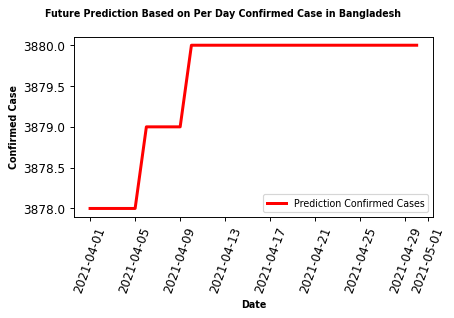

In [92]:
plt.figure(figsize=(6,4))
plt.figure(dpi=86)
plt.plot(
    future_index,
    future_predict_flatten,
    label='Prediction Confirmed Cases',
    color='red',
    linewidth=2.5
)
plt.suptitle('Future Prediction Based on Per Day Confirmed Case in Bangladesh',fontsize=8,fontweight='bold')
plt.xlabel('Date',fontsize=8,fontweight='bold')
plt.ylabel('Confirmed Case',fontsize=8,fontweight='bold')
plt.xticks(rotation=70)
plt.legend(prop={"size":8})
plt.tight_layout(3)
plt.show()  

<Figure size 576x360 with 0 Axes>

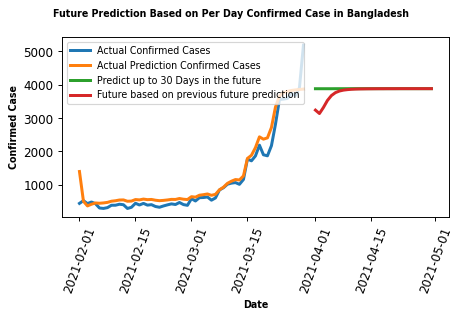

In [93]:
plt.figure(figsize=(8, 5))
plt.figure(dpi= 86)
plt.plot(
    cases.index[:len(X_all_flatten)],
    X_all_flatten,
    label='Actual Confirmed Cases',
    linewidth=2.5
)
plt.plot(
    cases.index[:len(X_all_flatten)],
    all_predict_flatten,
    label='Actual Prediction Confirmed Cases',
    linewidth=2.5
)
plt.plot(
    future_index,
    future_predict_flatten,
    label='Predict up to ' + str(days_to_predict) + ' Days in the future',
    linewidth=2.5
)
plt.plot(
    future_index,
    f_future_predict_flatten,
    label='Future based on previous future prediction',
    linewidth=2.5
)

plt.suptitle('Future Prediction Based on Per Day Confirmed Case in Bangladesh',fontsize=8,fontweight='bold')
plt.xlabel('Date',fontsize=8,fontweight='bold')
plt.ylabel('Confirmed Case',fontsize=8,fontweight='bold')
plt.xticks(rotation=70)
plt.legend(prop={"size":8})
plt.tight_layout(3)
plt.show()

RANDOM FOREST REGRESSION

In [94]:
def data_split(data, look_back=1):
    x, y = [], []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back), 0]
        x.append(a)
        y.append(data[i + look_back, 0])
    return np.array(x), np.array(y)

In [95]:
test_size = TEST_SIZE
test_size = int(cases.shape[0] * test_size)
train_cases = cases[:-test_size]
test_cases = cases[-test_size:]

In [96]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(cases)
all_cases = scaler.transform(cases)
train_cases = scaler.transform(train_cases)
test_cases = scaler.transform(test_cases)

In [97]:
look_back = LOOK_BACK
X_all, Y_all = data_split(all_cases, look_back=look_back)
X_train, Y_train = data_split(train_cases, look_back=look_back)
X_test, Y_test = data_split(test_cases, look_back=look_back)

In [98]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((40, 1), (40,), (15, 1), (15,))

In [99]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
model = rf.fit(X_train, Y_train)

In [100]:
all_predict = model.predict(X_all)

In [101]:
Y_train_flatten = np.array(scaler.inverse_transform(
    np.array(Y_train).reshape(Y_train.shape[0], 1)
)).flatten().astype('int')
Y_test_flatten = np.array(scaler.inverse_transform(
    np.array(Y_test).reshape(Y_test.shape[0], 1)
)).flatten().astype('int')
all_predict_flatten = np.array(scaler.inverse_transform(
    np.array(all_predict).reshape(all_predict.shape[0], 1)
)).flatten().astype('int')
all_predict_flatten = np.absolute(all_predict_flatten)

In [102]:
y_train_predict=model.predict(X_train)
y_test_predict=model.predict(X_test)

In [103]:
from sklearn.metrics import mean_squared_error
import math

print('Train RMSE')
print(math.sqrt(mean_squared_error(Y_train_flatten,y_train_predict)))
print('Test RMSE')
print(math.sqrt(mean_squared_error(Y_test_flatten,y_test_predict)))


Train RMSE
560.8730916701334
Test RMSE
3308.4662299468678


In [104]:
all_predict_score = math.sqrt(
    mean_squared_error(
        Y_all_flatten, 
        all_predict_flatten
    )
)
print("All RMSE :",all_predict_score)

All RMSE : 1217.6041761691529


SVR

In [105]:
from sklearn.svm import SVR  
svr = SVR(kernel='rbf', gamma=0.1) 
model2 = svr.fit(X_train, Y_train)

In [106]:
y_train_predict=model2.predict(X_train)

In [107]:
y_train_predict

array([-0.87831844, -0.8718201 , -0.87871432, -0.87499132, -0.87895182,
       -0.88922442, -0.89024928, -0.88835685, -0.88274941, -0.88267034,
       -0.88029734, -0.88140498, -0.8903281 , -0.88756786, -0.87808089,
       -0.88203773, -0.87831844, -0.88243313, -0.88124677, -0.88567319,
       -0.88748895, -0.88440926, -0.88180047, -0.87950593, -0.88093033,
       -0.87617992, -0.88116767, -0.88290753, -0.86705968, -0.87261311,
       -0.86475767, -0.86436071, -0.86309037, -0.87063036, -0.86539276,
       -0.84641825, -0.84110619, -0.83271775, -0.83011135, -0.82892756])

In [108]:
y_test_predict=model2.predict(X_test)

In [109]:
from sklearn.metrics import mean_squared_error
import math

print('Train RMSE')
print(math.sqrt(mean_squared_error(Y_train_flatten,y_train_predict)))
print('Test RMSE')
print(math.sqrt(mean_squared_error(Y_test_flatten,y_test_predict)))

Train RMSE
560.865688703284
Test RMSE
3308.442467767669


In [110]:
all_predict = model2.predict(X_all)
all_predict_score = math.sqrt(
    mean_squared_error(
        Y_all_flatten, 
        all_predict_flatten
    )
)
print("All RMSE",all_predict_score)

All RMSE 1217.6041761691529
